# Лабораторная работа - Классификация

**Цель работы:** Изучение методов классификации данных

**Задачи:**
1. Подгововить данные
2. Создать нейронную сеть
3. Проверить работу сети

## Задание на лабораторную работу

1. Загрузить и провести предварительную обработку данные из заданного вашим вариантом датасета (если в данных есть пропуски, то их надо убрать)
2. Выберите иследуемый признак (поле класса)
2. Создайте и обучите нейронную сеть то точность не менее 85% (метрика F1) на тестовой выборке, а так же выведите следующие показатели:
    1. Точность обучения (по эпохам) (Точность мериется метриками: Precision и Recall)
        1. Ошибка на тренировочной выборке
        2. Ошибка на тестовой выборке
        2. Точность для тренировочной выборе
        3. Точность для тестовой выборке
    2. Использую ROC кривую найдите оптимальное пороговое значение, указывающие на наличие класса. *Это надо проделать для каждого класса в случае не бинарной классификации*
    3. Постройте матрицу ошибок для каждого класса
    2. С помошью алгоритма PCA отобразите проекцию ваших признаков в 2-х мерную систему координат.
    3. Разбейте и раскрасте систему координат на плоскости, которые соотвествуют вашему кластеру


## Требования к оформлению работы

1. Работа должна быть выполнена в формате Jupyter-notebook (*.ipynb)
2. Работа должна быть разделена на главы: титульная надпись, цель работы, ход работы и вывод
2. Все надпись в работе (текст, кроме коментариев кода) должен быть оформлен на языке Markdown
3. Вывод ячеек с кодом (ceils) должен сопроводжаться описанием и описание должно быть оформлено в отдельной ячейки в формате Markdown. Данное правило относится только к выводу который представляет интерес с точки зрения хода работы, вывод для служебных ячеек или переходных действий описывать не надо

## 1. Подгововить данные

### Загрузка

In [ ]:

# подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()
data_future = iris_data.data
data_target = iris_data.target

data = pd.concat([
  pd.DataFrame(data_future, columns=iris_data.feature_names),
  pd.DataFrame(data_target, columns=['target'])['target'].map({k: v for k, v in enumerate(iris_data.target_names)})
], axis=1)

data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Нормализация

Нормализация данных это приведение данных в некий стандартный вид

Для алгоритмов машинного обучения это - числовой вид и желательно что бы все числа лежали в диапазоне от -1 до 1 или от 0 до 1 

In [ ]:
# Исходные данные
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Как можно видеть ниже мы преобразовали колонку Species в 3 колонки к которых записан либо 0 либо 1
3 колонки потому что в колонки 3 класса (3 разных надписи)
0 или 1 - это какой клас был изначально

In [ ]:
# Первым делом представим строковые данные как числовые
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(data)
number_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_setosa,target_versicolor,target_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


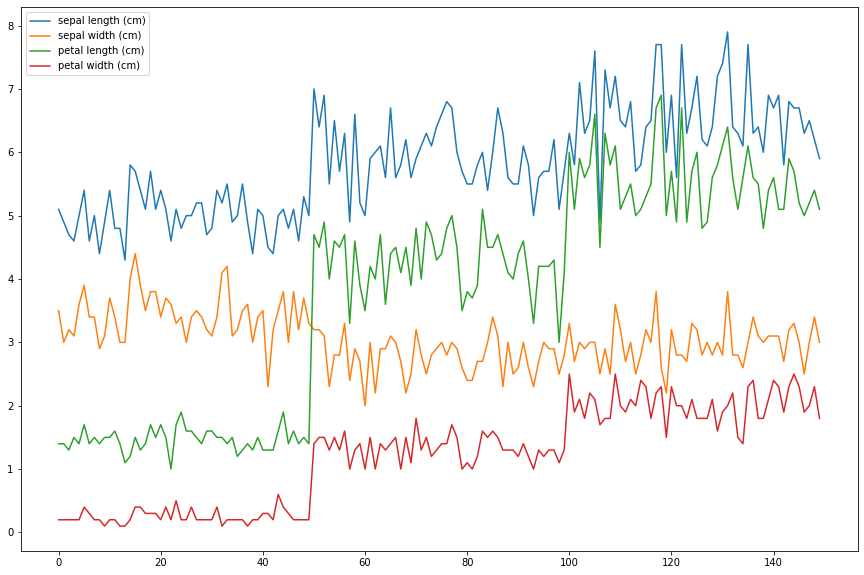

In [ ]:
number_data[number_data.columns[:-3]].plot(figsize=(15, 10))

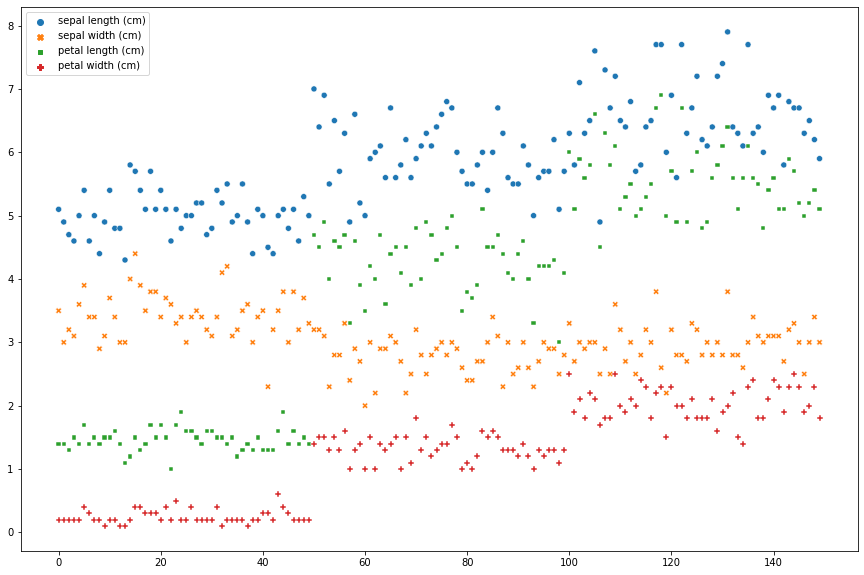

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=number_data[number_data.columns[:-3]])

Простая номализация.
Данных маштабируются на промежуток от 0 до 1, где 0 - минимум в данных, а 1 - это максимум.
Все остальные находятся между ними
*Обратите внимание на размер оси y на графике*

In [ ]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_setosa,target_versicolor,target_virginica
0,0.222222,0.625000,0.067797,0.041667,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,1.0,0.0,0.0


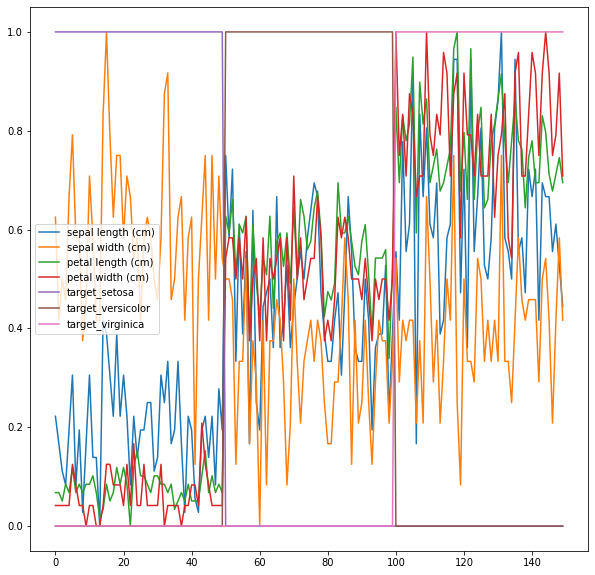

In [ ]:

# Данный нормализатор выравнивает данные относительно минимального и максимального
mm_norm_number_data.plot(figsize=(10, 10), )

Следующий нормализатор похож на предыдущий, только он маштабирует данные относительно максимального по модулю

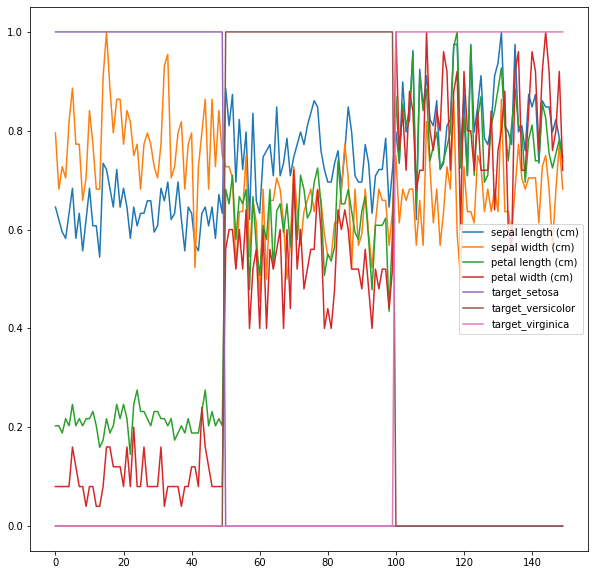

In [ ]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))
ma_norm_data.plot(figsize=(10, 10))


Это более продвинутая нормализация, она использует статистику для определения центра в данных (мат. ожинания) и висперсии данных и в соответствие с этим маштабирует данные

In [ ]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))

Обратите внимание
Данные хоть и маштабированы, но они не лежат в диапазоне от -1 до 1, а привышают его. Тут можно испоьзовать дополнительно MinMaxScaler

<AxesSubplot:>

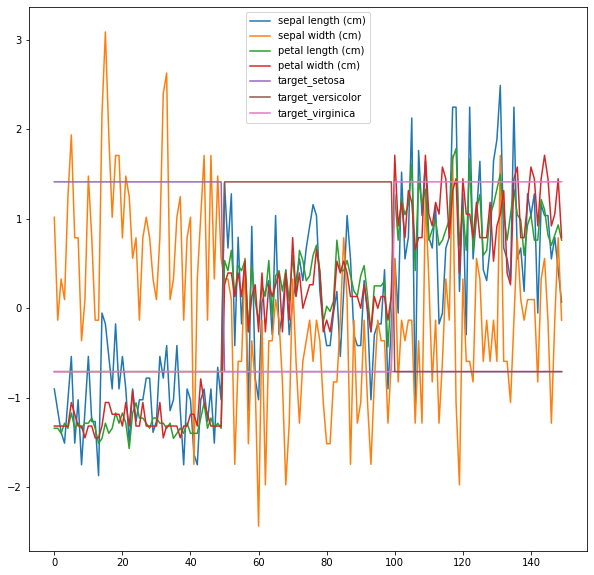

In [ ]:
std_norm_data.plot(figsize=(10, 10))

Данный нормализатор похож на предидущий, только он в добавок ко всему убирает выбросы (промахи) в данных

In [ ]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))


Тут все те же проблемы, что и у StandartScaler

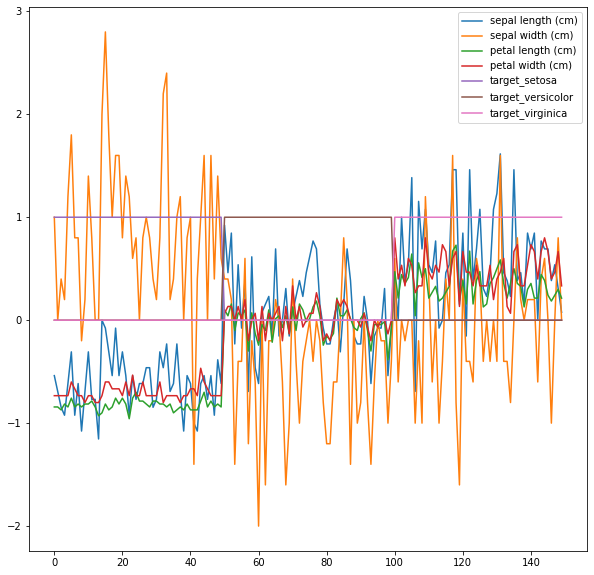

In [ ]:
std_clear_norm_data.plot(figsize=(10, 10))

## 2. Дополнительные функции


In [ ]:
from contextlib import contextmanager
from time import time

@contextmanager
def measure_time():
  t = time()
  yield
  print(f'Потрачено времени {time() - t} сек')

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Нейронные сети (Keras)


**Обратите внимание** Не обязательно повторять пошагово все модификации и улучшения нейронной сети. Вы можите сразу же сделать 1 хорошую сеть. Показанная пошаговая разработка ниже нужна как демонстрация просесса разработки

## Подготовка данных

Создадим еще один препроцессор

У нас будет 2 pipeline'а:

1. Для входных данных
2. Для выходных  


У входных и выходных данных будут общие следующие обработчики:

1. DropOutlet - наш класс для удаления выбросов
2. Конвертация из DataFrame в ndarray


*Препроцессор DropOutlet идет отдельно от всех других препроцессоров*


**Препроцессор для входных данных:**

1. Конвертация из DataFrame в ndarray
2. Нормализация с помощью препроцессора MinMaxScaler


**Препроцессор для выходных данных:**

1. Конвертация из DataFrame в ndarray
2. Преобразование из категорий в виде строк в числовой номер (1.2.3.4): ModifyLabelEncoder
3. Добавляем еще одну размерность для данных (нужно для следующего препроцессора): ExpandDims
4. Кодируем наши категории как вектор с одной 1 : OneHotEncoder
Вот наглядно, что делает OneHotEncoder


![alt text](https://camo.githubusercontent.com/06c47dcc853a8ba6800c0b1e2ebbdf828e73c1ef/68747470733a2f2f332e62702e626c6f6773706f742e636f6d2f2d48444576315f7a336763342f57687179417271576337492f4141414141414141446a492f75394b384f7243593754634c724e46444f7553515065436c434176326a52763277434c63424741732f73313630302f53637265656e25324253686f74253242323536302d31312d32362532426174253242372e32312e3539253242504d2e706e67)

У pipeline обектов есть 3 метода:

1. fit - тренирует обект. Тут происходит запоминание особенностей данных (если они нужны)
2. transform - непосредственное преобразование данных
3. fit_transform - в начале тренирует, а потом преобразует

## Построение простой нейронной сети

Для удобства работы с нейронной сеть, переопределим переменные

- number_data_ready_X теперь X_train
- number_data_ready_Y теперь Y_train


В перепенной X_train хранятся данные для тренировки сети (входные)


В перепенной Y_train хранятся данные для тренировки сети (выходные или правильные ответы)

In [ ]:
from sklearn.model_selection import train_test_split

X = mm_norm_number_data[mm_norm_number_data.columns[:-3]]
Y = mm_norm_number_data[mm_norm_number_data.columns[-3:]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

#### Подключаем библиотеку keras


```Python
from keras.layers import Dense
```
Строка отвечает за подключение сущности Dense которая реализует простой полносвязные слой сети (FFN)

```Python
from keras.models import Sequential
```
Строка отвечает за подключение сущности Sequential которая реализует саму нейронную сеть

```Python
from keras import activations
```
Это импорт (activations) содержи в себе список функций активании для сети

```Python
from keras.optimizers import Adam, RMSprop
```
Тут мы подключаем алгоритмы тренировки Адам и алгоритм обратного распостранения ошибки(RMSprop)

```Python
from keras.losses import categorical_crossentropy
```
Подключаем фукцию подсчета ошибки сети (кросэтропися для данных представленных в виде категорий)

```Python
from keras.metrics import categorical_accuracy
```
Подключаем фукцию подсчета метрики сети (точность попадания в категорию)


In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
# from keras.optimizer_v2.adam import Adam
# from keras.optimizer_v2.rmsprop import RMSProp
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

#### Создаем сеть
```Python
model = Sequential()
```
Создаем сущность сети

```Python
model.add(Dense(10, activation=activations.relu, input_dim=X_train.shape[1]))
```
Добавляем слой сети из 10 нейронов с функцией активации Relu и количеством входом равным количеству столбцов во входном массиве

```Python
model.add(Dense(Y_train.shape[1], activation=activations.softmax)) # output = 3
```
Добавляем последний слой(выходной) количество нейронов равно количеству столбцов в выходном массиве и функцией активации Softmax 

```Python
model.compile(Adam(), categorical_crossentropy, metrics=[categorical_accuracy])
```
Компилируем (собираем) сеть с параметрами:
- алгоритм обучения: *Adam*
- Функция обибки: *categorical_crossentropy*
- дополнительные метрики:
    - categorical_accuracy


In [ ]:
model = Sequential()
model.add(Dense(10, activation=activations.relu, input_dim=X.shape[1])) # input_dim = 4
model.add(Dense(Y.shape[1], activation=activations.softmax)) # output = 3

model.compile(Adam(), categorical_crossentropy, metrics=['acc'])

### Обучение


Запускаем обучение сети с параметрами:
- 1 параметр: матрица с входным массивом
- 2 параметр: матрица с требуемыми ответами (выходная матрица)
- verbose=2 : устанавливаем уровень вывода отладочной информации на 2 уровень
- epochs=100 : задаем количество эпох для обучения (100 для начала более чем достаточно)
- batch_size=3 : размер группы для обучения (пакетный метод), гду говоря как часто пересчитывать веса сети (влияет на скорость и что более важно на качество обучения (параметр подбирается опытным путем) )

In [ ]:
model.fit(X_train, y_train, verbose=2, epochs=100, batch_size=3)

Epoch 1/100
30/30 - 0s - loss: 0.2917 - acc: 0.9778
Epoch 2/100
30/30 - 0s - loss: 0.2887 - acc: 0.9778
Epoch 3/100
30/30 - 0s - loss: 0.2838 - acc: 0.9778
Epoch 4/100
30/30 - 0s - loss: 0.2818 - acc: 0.9778
Epoch 5/100
30/30 - 0s - loss: 0.2776 - acc: 0.9778
Epoch 6/100
30/30 - 0s - loss: 0.2737 - acc: 0.9778
Epoch 7/100
30/30 - 0s - loss: 0.2695 - acc: 0.9889
Epoch 8/100
30/30 - 0s - loss: 0.2676 - acc: 0.9778
Epoch 9/100
30/30 - 0s - loss: 0.2630 - acc: 0.9889
Epoch 10/100
30/30 - 0s - loss: 0.2590 - acc: 0.9889
Epoch 11/100
30/30 - 0s - loss: 0.2557 - acc: 0.9889
Epoch 12/100
30/30 - 0s - loss: 0.2530 - acc: 0.9778
Epoch 13/100
30/30 - 0s - loss: 0.2503 - acc: 0.9778
Epoch 14/100
30/30 - 0s - loss: 0.2460 - acc: 0.9889
Epoch 15/100
30/30 - 0s - loss: 0.2435 - acc: 0.9889
Epoch 16/100
30/30 - 0s - loss: 0.2403 - acc: 0.9889
Epoch 17/100
30/30 - 0s - loss: 0.2382 - acc: 0.9778
Epoch 18/100
30/30 - 0s - loss: 0.2331 - acc: 0.9889
Epoch 19/100
30/30 - 0s - loss: 0.2321 - acc: 0.9889
Ep

Посчитаем точность сети (1 цифра показывает ошибку сети, 2 метрику (точность) )

In [ ]:
# для тестовых данных
model.evaluate(X_train, y_train)

3/3 [==============================] - 0s 4ms/step - loss: 0.1063 - acc: 0.9889


[0.10625537484884262, 0.9888888597488403]

In [ ]:
# для тренировочных
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1231 - acc: 0.9500


[0.12313224375247955, 0.949999988079071]

In [ ]:
X_train.shape, X_test.shape

((90, 4), (60, 4))

### Построение усложненого варианта НС с делением данных на обучающую и тестовую выборку с визуализацие процесса обучения

In [ ]:
# Подключим новые библиотеки
# библиотека дополнительных возможностей (действий) при обучении сети
from keras import callbacks

#### Разделение на обучающую и тестовую выборки (руками)
Для полноценной оценки работы сети ее надо оценивать не только на тренировочной выборе (это наш 1 вариант сети), но и на тестовой (это та выборка которая никогда не подавалась на нейронную сеть)

In [ ]:
# Делим
# Делить будем в отношении 80/20
# 80 - это обучение
# 20 - тест
# первым делом перемешаем выборку (надо для того что бы обе выборки были репрезентативными)
XY_data = np.hstack( (X, Y) ).transpose((0,1))
np.random.shuffle(XY_data)
# Делим выборки
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')
# Делим все на входные и выходные данные
# Тренировочные
X_train = train_data[:, :X.shape[1] ]
Y_train = train_data[:, Y.shape[1]: ]
print(f'Размер данные для тренировки (входных): {X_train.shape}')
print(f'Размер данные для тренировки (выходных): {Y_train.shape}')

# Тестовые
X_test = test_data[:, :X.shape[1] ]
Y_test = test_data[:, Y.shape[1]: ]
print(f'Размер данные для теста (входных): {X_test.shape}')
print(f'Размер данные для теста (выходных): {Y_test.shape}')

Всего данных: 150
Тренировочных данных: 120
Тестовых данных: 30
Размер данные для тренировки (входных): (120, 4)
Размер данные для тренировки (выходных): (120, 4)
Размер данные для теста (входных): (30, 4)
Размер данные для теста (выходных): (30, 4)


#### Именим способ создания сети

В работе библиотеки *keras* есть одна особенность  
**Запуская метод *fit* 2 и более раз вы будете обучать всегда одну и туже сеть**

Поэтому мы обернем создание сети в метод для того что бы при каждом вызове метода fit создавалась новая сеть

In [ ]:
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.relu, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.softmax))
    model.compile(Adam(), categorical_crossentropy, metrics=['acc'])
    return model

В обучение модели добавим проверку на тестовых данных, так же добавим наш первый callback - *History*: он просто сохраняет историю измерения ошибки и метрик по эпохам

In [ ]:
model = make_nn(X_train.shape[1], Y_train.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=5,
    epochs=300,
    verbose=0,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети


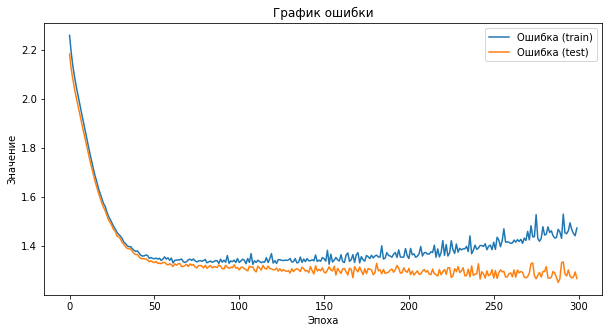

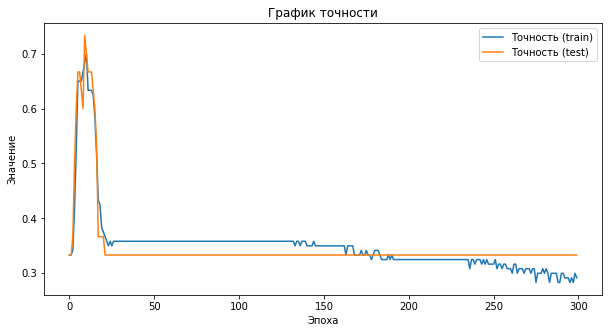

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

На самом деле в *keras* все готово для разделения данных на тренировочные и тестовые

In [ ]:
model = make_nn(X.shape[1], Y.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=3,
    epochs=100,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети
Epoch 1/100
40/40 [==============================] - 1s 16ms/step - loss: 1.1004 - acc: 0.3583 - val_loss: 1.1472 - val_acc: 0.0333
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.0303 - acc: 0.7500 - val_loss: 1.1790 - val_acc: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.9508 - acc: 0.8333 - val_loss: 1.1972 - val_acc: 0.0000e+00
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8732 - acc: 0.8333 - val_loss: 1.2581 - val_acc: 0.0000e+00
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.8101 - acc: 0.8333 - val_loss: 1.2483 - val_acc: 0.0000e+00
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7536 - acc: 0.8333 - val_loss: 1.2619 - val_acc: 0.0000e+00
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7044 - acc: 0.8333 - val_loss: 1.2804 - val_acc: 0.0000e+00
Epoch 8/100
40/40 [================

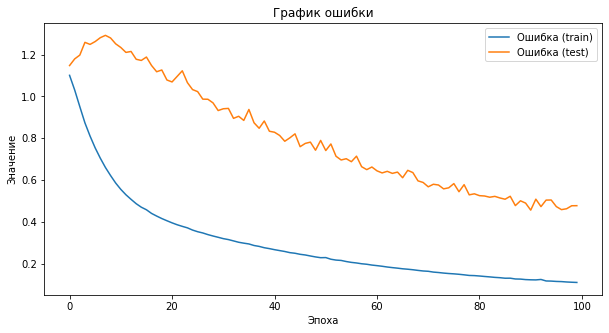

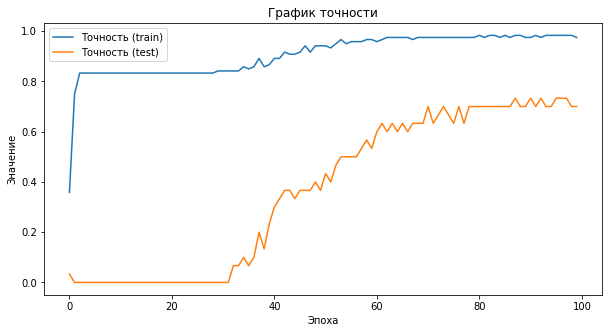

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)'])

### Улучшение сети - Ранняя остановка
Как можно видеть на графиках выше - в какой, то момент сеть перестает улучшать свой результат и тут в лучшем случае ее надо останавливать, проблма в том, что вы не знаете заранее когда надо останавливаться (сколько нужно циклов обучения (эпох) ) 

In [ ]:
model = make_nn(X.shape[1], Y.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=5,
#     Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#             На основе какого значения будет приниматься решеня об остановке
            monitor='val_acc',
#             Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#             Количество эпок в резельтате которых если значение не изменилось, то произвести остановку
            patience=5,
#             "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.01,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
24/24 [==============================] - 1s 14ms/step - loss: 1.0697 - acc: 0.1667 - val_loss: 0.7253 - val_acc: 1.0000
Epoch 2/300
24/24 [==============================] - 0s 5ms/step - loss: 1.0383 - acc: 0.1667 - val_loss: 0.7466 - val_acc: 1.0000
Epoch 3/300
24/24 [==============================] - 0s 4ms/step - loss: 1.0141 - acc: 0.1917 - val_loss: 0.7779 - val_acc: 1.0000
Epoch 4/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9915 - acc: 0.2333 - val_loss: 0.8075 - val_acc: 0.9667
Epoch 5/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9704 - acc: 0.3417 - val_loss: 0.8258 - val_acc: 0.8333
Epoch 6/300
24/24 [==============================] - 0s 4ms/step - loss: 0.9513 - acc: 0.4583 - val_loss: 0.8633 - val_acc: 0.4000


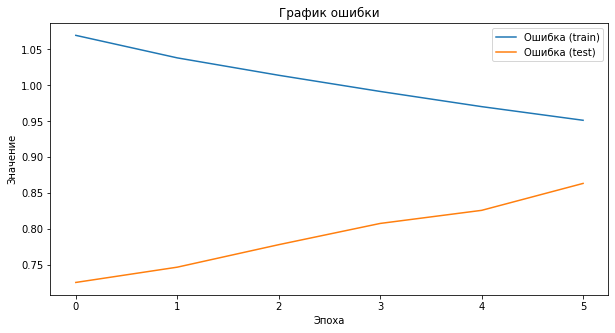

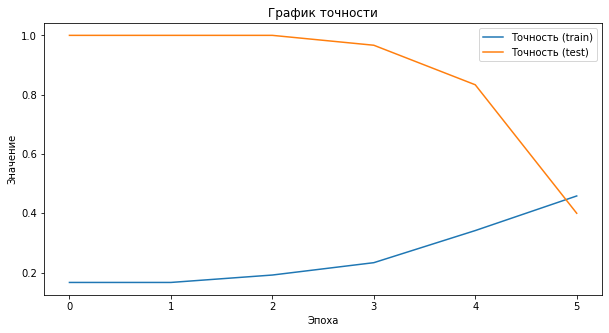

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

### Контрольные точки
В обучении НС самый последний результат обучения не всегда самый лучший результат, это вызвано несколькими причинами, например переобучением сети или скатыванию к среднему значению.  
Для того что бы поймать тот самый лучший результат обучения, были придуманы "контрольные точки" *ModelCheckpoint*


Для использования контрольных точек необходимо подготовить директорию, где будут хранится контрольные точки

In [ ]:
from pathlib import Path
from os import remove

In [ ]:
# создадим функцию создания о очисти каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'nn_model_loss-{loss:.2f}_val_loss-{val_loss:.2f}_acc-{acc:.2f}_val_acc-{val_acc:.2f}.hdf5'
def make_save_points(name='save_points', file_name=file_name):
#     выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

    

In [ ]:
print('Начинаем обучение сети')
history = make_nn(X.shape[1], Y.shape[1]).fit(
    x=X,
    y=Y,
    batch_size=3,
    epochs=300,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
        callbacks.EarlyStopping(
            monitor='val_acc',
            mode='max',
            patience=50,
            min_delta=0.01
        ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#             Указываем какое значение отслеживать
            monitor='val_acc',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=5,
#             Указываем сторону лучших значений
            mode='max'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками /content/save_points
Удаляем файл save_points/nn_model_loss-0.98_val_loss-1.18_acc-0.68_val_acc-0.00.hdf5
Epoch 1/300
40/40 [==============================] - 1s 5ms/step - loss: 1.1361 - acc: 0.5833 - val_loss: 0.8431 - val_acc: 1.0000
Epoch 2/300
40/40 [==============================] - 0s 2ms/step - loss: 1.0789 - acc: 0.5833 - val_loss: 0.9085 - val_acc: 1.0000
Epoch 3/300
40/40 [==============================] - 0s 2ms/step - loss: 1.0308 - acc: 0.5833 - val_loss: 0.9749 - val_acc: 0.9667
Epoch 4/300
40/40 [==============================] - 0s 2ms/step - loss: 0.9918 - acc: 0.5750 - val_loss: 1.0149 - val_acc: 0.7333
Epoch 5/300
40/40 [==============================] - 0s 2ms/step - loss: 0.9593 - acc: 0.5833 - val_loss: 1.0601 - val_acc: 0.6333
Epoch 6/300
40/40 [==============================] - 0s 2ms/step - loss: 0.9305 - acc: 0.6333 - val_loss: 1.0780 - val_acc: 0.5333
Epoch 7/300
40/40 [===========================

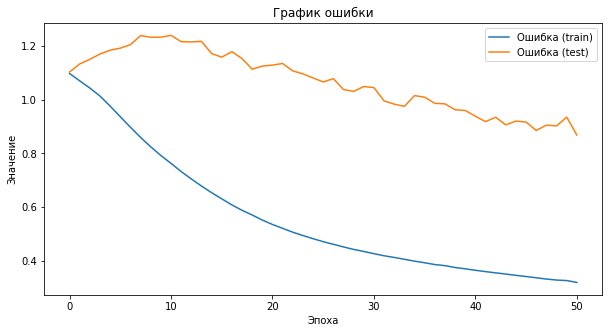

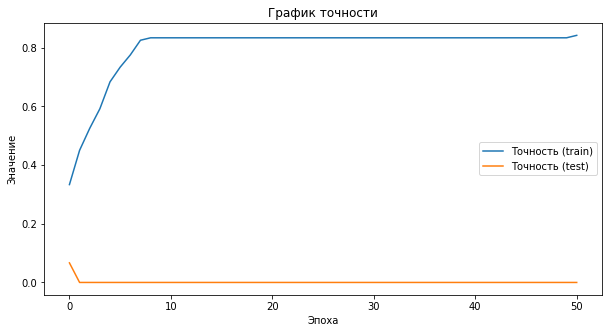

In [ ]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

Воспользуемся контрольными точками

In [ ]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.96_val_loss-1.06_acc-0.58_val_acc-0.63.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, y_test)[1]}')
predict = loaded_model.predict(X_test)
predict

4/4 [==============================] - 0s 3ms/step - loss: 0.9705 - acc: 0.6000
Точность предсказания на тренировочных данных 0.6000000238418579
1/1 [==============================] - 0s 19ms/step - loss: 0.9517 - acc: 0.6000
Точность предсказания на тестовых данных 0.6000000238418579


array([[0.36775774, 0.33727643, 0.29496577],
       [0.33177897, 0.2965466 , 0.37167448],
       [0.33475298, 0.3327793 , 0.3324678 ],
       [0.32348835, 0.31957844, 0.35693318],
       [0.47515124, 0.31075817, 0.21409056],
       [0.34898326, 0.32977933, 0.32123744],
       [0.46107528, 0.31730932, 0.2216154 ],
       [0.37568614, 0.2724543 , 0.35185954],
       [0.4971024 , 0.29498112, 0.20791641],
       [0.46168414, 0.31590733, 0.22240856],
       [0.4363378 , 0.3321503 , 0.23151195],
       [0.36048397, 0.30551848, 0.3339975 ],
       [0.4824347 , 0.30170372, 0.21586154],
       [0.35816848, 0.3305207 , 0.31131083],
       [0.33266738, 0.33549616, 0.3318364 ],
       [0.35927865, 0.3568303 , 0.28389105],
       [0.47593188, 0.30431977, 0.21974838],
       [0.34869915, 0.33975056, 0.3115503 ],
       [0.34570763, 0.29563192, 0.3586604 ],
       [0.33475298, 0.3327793 , 0.3324678 ],
       [0.3729286 , 0.34085461, 0.2862168 ],
       [0.3439612 , 0.2972633 , 0.3587755 ],
       [0.

In [ ]:
# Прдсказываем вероятности для классов
loaded_model.predict(X_train).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 2])

Визуализируем наши классы

(150, 2)


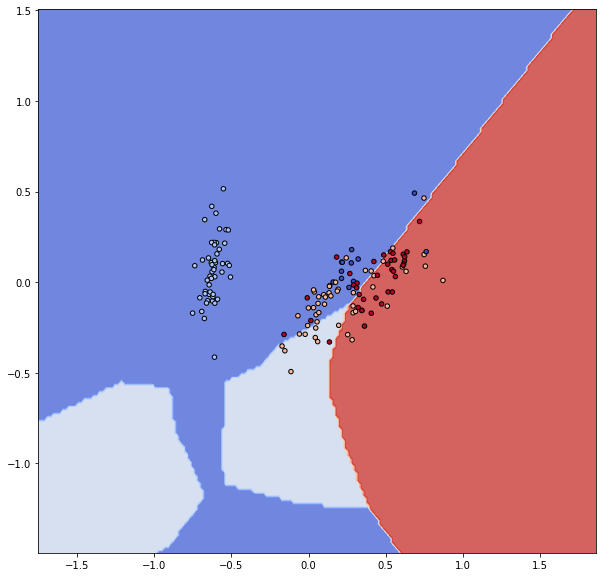

In [ ]:
from sklearn.decomposition import PCA

# Задаем ту модель, которую будем использовать для рисования графика
model_clf = loaded_model

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: model_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])).argmax(axis=1)

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=X.apply(lambda x: x.argmax(), axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
pd.concat()